# Phase 4 Project: Movie Recommendation System
---
<div>
<img src="images/Phase_4_Project.png" width="400">
</div>

---

### Project Team: Group 2
- **Rose Kyalo**
- **Angel Linah Atungire**
- **Oscar Mulei**

#### Overview
In the dynamic and rapidly evolving digital marketplace, recommendation systems play a pivotal role. They efficiently bridge the gap between users and a diverse array of products by analyzing user behaviors and preferences. These systems are integral in enhancing the shopping experience, providing personalized suggestions, and aiding sellers in effectively meeting customer requirements. This results in significant improvements in sales and customer satisfaction.

#### Business Understanding
The objective of this project is to develop a sophisticated movie recommendation system. This system will recommend the top five films based on user ratings. Employing content-based recommendation system, the system will analyze user preferences to offer tailored recommendations. The primary aim is to establish a recommender system, an artificial intelligence subset, designed to predict user preferences and suggest movies that align with these preferences. Collaborative filtering will be the key technique employed to ascertain user preferences accurately.

#### Business Problem
Company A, a leader in the movie production industry, is focused on optimizing its promotional strategies for its diverse film portfolio. The company has sought our expertise in engineering a robust movie recommendation system. This system is intended to deliver bespoke movie suggestions to its audience, thereby augmenting user engagement and supporting successful promotional campaigns.

#### Objective
The principal objective of this system is to analyze and understand user behaviors and preferences through their movie rating history. With this insight, the system will strive to:

1. **Precision in Recommendations:** Develop an algorithm capable of accurately identifying and suggesting the top five movies based on user ratings. These recommendations should closely align with the individual preferences of each user.

2. **Enhancement of User Engagement:** Create a recommendation system that significantly boosts user engagement. This will be achieved by delivering personalized movie suggestions, thereby increasing user interaction and the duration of user engagement on the platform.

3. **Generation of Personalized Recommendations:** Formulate recommendations that are specifically tailored to align with each user's distinct interests.

#### Data Source

The data for this project will be sourced from the GroupLens Research Project, specifically the MovieLens dataset, available at [GroupLens](https://grouplens.org/datasets/movielens/latest/). This comprehensive dataset includes:

- User ratings: A collection of movie ratings provided by users, which is the cornerstone of our collaborative filtering model.
- Movie details: Information on various movies, including genres, release dates, and more, which aids in understanding the context of user preferences.
- Links: References to other databases, which could be useful for enriching our dataset with additional movie information.
- Tags: User-generated tags for movies, offering insights into the nuanced preferences of users.


#### Movie Recommendation System Development Steps

1. **Data Collection & Preprocessing**
    - Acquire and clean the MovieLens dataset.
    - Address inconsistencies, anomalies, and missing values.

2. **Exploratory Data Analysis (EDA)**
    - Conduct statistical and visual analysis to identify patterns and trends.

3. **Model Development: Building the Recommendation System**
    - **3.1: Content-Based Recommendation System Focused on Movie title**
    - **3.2: Content-Based Recommendation System Focused on Movie Genres**

4. **Model Development: Interactive Recommendation Widget**
    - To enhance user engagement and provide a user-friendly interface, we will create an interactive recommendation widget. Users can enter a movie title, and the widget will display recommended movies based on their preferences.

5. **Model Evaluation & Refinement**
    - Assess the model using accuracy, precision, and recall.

---
### Data Collection and Preprocessing

In [1]:
# Imported Libraries: Imported necessary Python libraries for data manipulation, analysis, and visualization.

import pandas as pd         
import numpy as np           
import matplotlib.pyplot as plt  
import seaborn as sns         
# import scipy.stats as stats   # Library for statistical analysis
import sklearn                # Library for machine learning and data mining
from sklearn.feature_extraction.text import TfidfVectorizer  # Text vectorization for NLP tasks
from sklearn.metrics.pairwise import cosine_similarity       # Calculating cosine similarity between vectors
import ipywidgets as widgets  # Library for creating interactive widgets in Jupyter notebooks
from IPython.display import display  # Displaying interactive widgets in Jupyter notebooks
import warnings              

# Suppress warnings from TfidfVectorizer about the 'token_pattern' parameter
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [2]:
# Data Loading: Loaded four datasets into DataFrames: links.csv, tags.csv, ratings.csv, and movies.csv.

links = pd.read_csv("Data/links.csv")
tags = pd.read_csv("Data/tags.csv")
ratings = pd.read_csv("Data/ratings.csv") # Dataset used to build the recommendation system
movies = pd.read_csv("Data/movies.csv") # # Dataset used to build the movies search engine 

# Display the first few rows of each dataframe to understand their structure
(links.head(), tags.head(), ratings.head(), movies.head())

(   movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       2    60756     will ferrell  1445714992
 3       2    89774     Boxing story  1445715207
 4       2    89774              MMA  1445715200,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II

In [3]:
# Data Types Verificatio: 
print("Movies DataFrame Info:")
movies.info()

print("\nRatings DataFrame Info:")
ratings.info()

print("\nLinks DataFrame Info:")
links.info()

print("\nTags DataFrame Info:")
tags.info()


Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Links DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ----- 

In [4]:
# Timestamp Conversion:Convert timestamp columns in `ratings.csv` and `tags.csv` to a more readable date-time format.
# Convert timestamp to datetime in ratings.csv and tags.csv

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# Display the updated data types for these two datasets
updated_data_types = {
    "ratings.csv": ratings.dtypes,
    "tags.csv": tags.dtypes
}

updated_data_types

{'ratings.csv': userId                int64
 movieId               int64
 rating              float64
 timestamp    datetime64[ns]
 dtype: object,
 'tags.csv': userId                int64
 movieId               int64
 tag                  object
 timestamp    datetime64[ns]
 dtype: object}

In [5]:
# Missing Values Check:

print("Missing Values in Movies DataFrame:")
print(movies.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings.isnull().sum())

print("\nMissing Values in Links DataFrame:")
print(links.isnull().sum())

print("\nMissing Values in Tags DataFrame:")
print(tags.isnull().sum())

Missing Values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Links DataFrame:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing Values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [6]:
# Handling Missing Values:Removed rows with missing data in the tmdbId column of the links.csv dataset, since it is only 0.082% of the data.
links.dropna(inplace=True)

In [7]:
# Check for duplicates in each dataset
duplicates = {
    "movies.csv": movies.duplicated().sum(),
    "ratings.csv": ratings.duplicated().sum(),
    "tags.csv": tags.duplicated().sum(),
    "links.csv": links.duplicated().sum()
}

duplicates

{'movies.csv': 0, 'ratings.csv': 0, 'tags.csv': 0, 'links.csv': 0}

In [8]:
# Genre Processing: Split the genres in the `movies.csv` dataset into lists for easier analysis

movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [9]:
# Title Cleaning: Clean movie titles in the movies.csv dataset using regular expressions.

import re

# Define a function to clean a movie title.
def clean_title(title):
    # Use regular expression substitution to remove characters that are not letters, digits, or spaces.
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    # Return the cleaned title.
    return title

In [10]:
movies["clean_title"] = movies["title"].apply(clean_title)

In [11]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",Jumanji 1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),[Comedy],Father of the Bride Part II 1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",Black Butler Book of the Atlantic 2017
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",No Game No Life Zero 2017
9739,193585,Flint (2017),[Drama],Flint 2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",Bungo Stray Dogs Dead Apple 2018


---
### Exploratory Data Analysis (EDA)

In this phase, we'll explore the datasets to gain insights that can guide our model development. We'll look at the distribution of ratings, the number of movies and users, and conduct a genre analysis.

In [12]:
movies_and_ratings = pd.merge(ratings, movies, on ='movieId')

In [13]:
movies_and_ratings.head()

,userId,movieId,rating,timestamp,title,genres,clean_title
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995


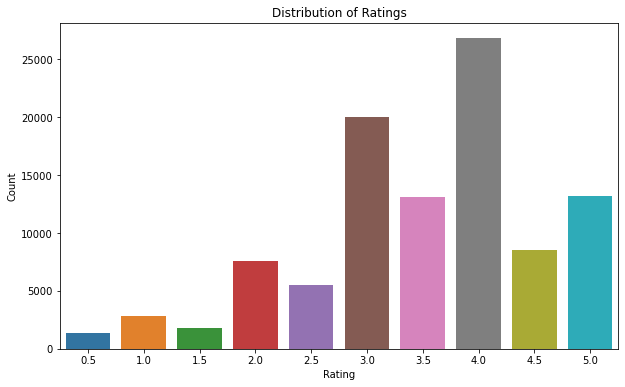

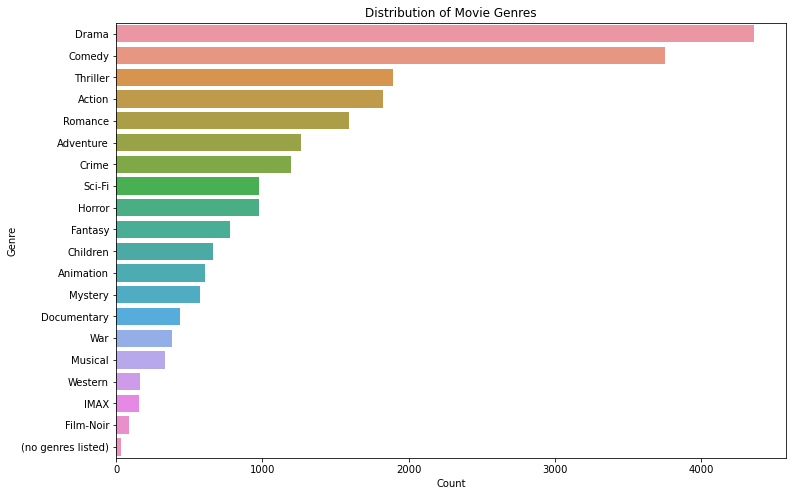

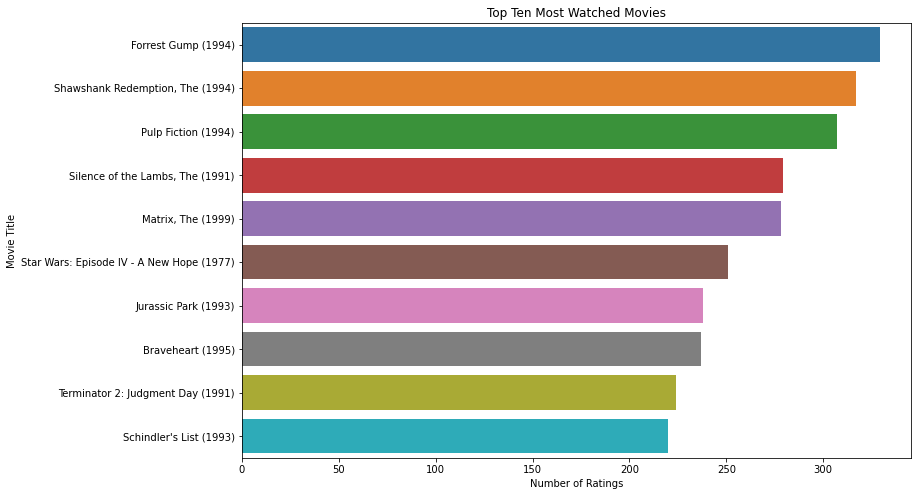

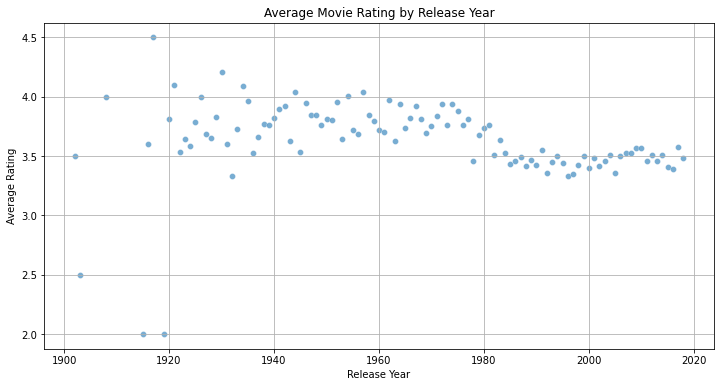

(610,
 9724,
 Drama        4361
 Comedy       3756
 Thriller     1894
 Action       1828
 Romance      1596
 Adventure    1263
 Crime        1199
 Sci-Fi        980
 Horror        978
 Fantasy       779
 Name: genre, dtype: int64)

In [14]:
# Exploratory Data Analysis

# 1. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 2. Number of Unique Users and Movies
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()

# 3. Genre Analysis
all_genres = sum(movies['genres'], [])
genres_df = pd.DataFrame(all_genres, columns=['genre'])
genre_counts = genres_df['genre'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts, y=genre_counts.index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# 4. Top Ten Most Watched Movies
movie_watch_counts = movies_and_ratings.groupby('title').size().reset_index(name='count')
top_ten_watched_movies = movie_watch_counts.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_ten_watched_movies, x='count', y='title')
plt.title('Top Ten Most Watched Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

# 5. Average Movie Rating by Release Year

movies_and_ratings['year'] = movies_and_ratings['title'].str.extract(r'\((\d{4})\)').astype(float)

average_ratings_by_year = movies_and_ratings.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='rating', data=average_ratings_by_year, alpha=0.6)
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Outputting Number of Unique Users and Movies, and Top 10 Genres

num_users, num_movies, genre_counts.head(10)

#### Exploratory Data Analysis (EDA) Summary

###### Ratings Distribution
- Users tend to give higher ratings, with a significant concentration at 4.0.

##### Number of Unique Users and Movies
- Number of Unique Users: 610
- Number of Unique Movies: 9,724

##### Genre Distribution
- The most common genres are Drama and Comedy, indicating diverse user preferences.


---
### Model Development: 3.1:  Content-Based Recommendation System Focused on Movie Titles

A Content-Based Recommendation System is a type of recommendation system that suggests items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that describe the items. In the context of movie recommendations, these descriptors are often the genres associated with each movie.

#### Step 1. Creating a TF-IDF Matrix for a Search Engine

We explore the concept of creating a TF-IDF (Term Frequency-Inverse Document Frequency) matrix and its application in building a simple search engine for movie titles.

1. **Understanding the Basics**
   - Our titles, such as movie titles, are stored in a computer as a set of numbers. Computers can't understand characters; they can only understand numbers. Therefore, we need to convert our titles into sets of numbers so the computer can search them effectively. This helps us find titles that are most similar to the search term we enter.
     
2. **Example Movie Titles- Building the Term Frequency Matrix**

Let's consider we have three movie titles: 
1. `"the"`
2. `"harry the potter"`
3. `"the harry"`

We will build what's called a `term frequency matrix`. In this matrix, each column represents a unique term found across these titles.

For our example, there are three unique words: `'the'`, `'harry'`, and `'potter'`. Thus, we will have three columns in our matrix. Each row in the matrix corresponds to a movie title, and we place a `1` in a column if the word occurs in the title, and `0` if it does not.

For instance:
- For `"the"`, we have a `'1'` for `'the'` and `'0's` for `'harry'` and `'potter'`.
- For `"harry the potter"`, we have `'1's` for all columns.

   
![Image Description: Three movie titles displayed.](./images/output_16_4.png)


3. **Applying Inverse Document Frequency (IDF)**
   - Next, we apply a concept called inverse document frequency. This step helps in identifying unique terms that are more informative for the search engine. Common terms like 'the' are less unique and thus less informative, whereas terms like 'harry' or 'potter' are more unique and informative.
   - Common terms are less informative; rare terms are more informative.

![Image Description: Graphical representation of IDF adjustment.](./images/output_16_5.png)

4. **Resulting Vector for Each Movie**
   - Each movie title is represented as a vector of numbers.
   - At the end of this process, we obtain a vector for each movie. This vector is a set of numbers that describes the movie title.


![Image Description: Vectors representing each movie title.](./images/output_16_6.png)

5. **Search and Similarity Computation**
   - The search query is converted into a vector and compared with movie title vectors.
   - Titles with the highest similarity scores are considered most similar to the search query.
   - When running a search, for instance, entering `"harry potter"` in a search box, the computer converts this title into a set of numbers. It then compares this set of numbers with the vectors of all movie titles in our database. The titles with the highest similarity scores are considered the most similar to our search query. In our example, the title `"harry potter"` and `"harry the potter"` would likely be the top result returned by the search engine.


![Image Description: Illustration of search query comparison with title vectors.](./images/output_16_7.png)


##### Steps Involved
1.1. **Initializing TfidfVectorizer:**
   - `TfidfVectorizer(ngram_range=(1, 2))`: This initializes the vectorizer to consider both unigrams (single words) and bigrams (pairs of consecutive words). Unigrams could capture individual keywords, while bigrams preserve some context (e.g., "star" vs. "star wars").

1.2. **Transforming Movie Titles:**
   - `fit_transform(movies["clean_title"])`: This step involves two processes:
     - **Fitting:** Learning the vocabulary of the movie titles. This creates an internal mapping of terms to feature indices.
     - **Transforming:** Converting the titles into a numerical format (TF-IDF matrix). Each title is represented as a vector where each dimension corresponds to the TF-IDF score of a term in the vocabulary.

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display
import numpy as np

#Step 1: Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Step 2:Create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(movies["clean_title"])

# Step 3: Search function
def search(title):
    title = clean_title(title)  # Define this function as per your requirement
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_matrix).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    return movies.iloc[indices].iloc[::-1]

# Step 4: Finding similar users
def find_similar_users(movie_id):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    return similar_users

# Step 5: Finding movies highly rated by similar users
def find_similar_user_recs(similar_users):
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    return similar_user_recs

# Step 6:  Calculate proportion of similar users who liked each movie
def calculate_proportions(similar_user_recs, similar_users):
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
    return similar_user_recs[similar_user_recs > .10]

# Step 7: Analyzing all users' preferences
def analyze_all_users(similar_user_recs):
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    return all_users["movieId"].value_counts() / len(all_users["userId"].unique())

# Step 8: Calculate number of times each movie was recommended
def recommendation_score(similar_user_recs, all_user_recs):
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    return rec_percentages.sort_values("score", ascending=False)

# Step 9: Interactive Recommendation Widget
movie_name_input = widgets.Text(value='Toy Story', description='Movie Title:', disabled=False)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            movie_id = results.iloc[0]["movieId"]
            similar_users = find_similar_users(movie_id)
            similar_user_recs = find_similar_user_recs(similar_users)
            proportions = calculate_proportions(similar_user_recs, similar_users)
            all_user_preferences = analyze_all_users(proportions)
            scores = recommendation_score(proportions, all_user_preferences)
            display(scores.head(10).merge(movies, left_index=True, right_on="movieId"))

movie_name_input.observe(on_type, names='value')
display(movie_name_input, recommendation_list)


Text(value='Toy Story', description='Movie Title:')

Output()

---

### Model Development: 3.2: Content-Based Recommendation System Focused on Movie Genres

#### What it means for a Content-Based Recommendation System focusing on movie genres:

1. **Content Representation**: 
   - Each movie in the system is represented by its genres. Genres are categorical labels like Action, Comedy, Romance, Sci-Fi, etc.
   - In the provided code, genres are processed and transformed into a numerical format using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This process converts the textual genre information into a vector (a set of numeric values), making it possible to perform mathematical operations on them.

2. **User Preferences**:
   - In content-based systems, recommendations are based on a user's past preferences or input. In this case, the user's preferences are indicated by the genres they input into the system.
   - The system assumes that if a user likes movies of certain genres, they are likely to enjoy other movies of similar genres.

3. **Recommendation Process**:
   - The recommendation is generated by comparing the user's preferred genres with the genres of movies in the database.
   - The similarity between the user's input genres and each movie's genres is calculated using cosine similarity, a metric that evaluates how similar two vectors are by measuring the cosine of the angle between them.
   - Movies with the highest similarity scores are considered the best matches to the user's preferences and are recommended to the user.

4. **Personalization**:
   - As the system uses the specific genres a user is interested in to generate recommendations, the recommendations are personalized and tailored to the user's individual tastes.

5. **Advantages and Limitations**:
   - Advantages: The system can recommend items very specific to the user's interests and does not require other users' data to make recommendations.
   - Limitations: The system is limited to recommending items that are similar to those already liked by the user (lack of diversity), and it might not work well if the user's preferences are not well-defined or if they change over time.

In summary, a Content-Based Recommendation System focusing on movie genres suggests movies to users based on the similarity of their genres to the genres that the user has shown a preference for. This approach can be highly effective for users with specific genre preferences but may not capture the full complexity of what makes a movie appealing to an individual.

In [16]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Step 1: Data Preparation
# Calculate the average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean()

# Ensure that 'genres' in the 'movies' DataFrame is a string
movies['genres'] = movies['genres'].astype(str)

# Step 2: Recommendation Function
def find_top_movies_by_genre(genre, top_n=10):
    if not genre:
        return pd.DataFrame(columns=['movieId', 'title', 'genres', 'avg_rating'])
    
    # Handle incomplete genre inputs
    genre_regex = r'\b' + genre + r'\b'

    # Filter movies that match the specified genre (using regex for precise matching)
    filtered_movies = movies[movies['genres'].str.contains(genre_regex, case=False, regex=True, na=False)]

    # Map the average ratings to the filtered movies
    filtered_movies = filtered_movies.copy()
    filtered_movies['avg_rating'] = filtered_movies['movieId'].map(average_ratings)

    # Sort by average rating and return top n movies
    recommended_movies = filtered_movies.sort_values(by='avg_rating', ascending=False).head(top_n)
    return recommended_movies[['movieId', 'title', 'genres', 'avg_rating']]

# Step 3: User Interaction through Widgets
genre_input = widgets.Text(value='', description='Genre:')
output_widget = widgets.Output()

def on_input_change(change):
    with output_widget:
        output_widget.clear_output()
        if change['new']:
            display(find_top_movies_by_genre(change['new']))

genre_input.observe(on_input_change, names='value')

# Display widgets
display(genre_input, output_widget)

Text(value='', description='Genre:')

Output()

---
### Model Evaluation & Refinement: Overall Assessment

This output gives a good mix of direct sequels, genre-matched movies, and broadly appealing films, which is typical for a movie recommendation system based on similarity and genre matching.

#### Future Scope
- Integration with real-time data for current trends.
- Incorporation of more user data for detailed recommendations.
- Deployment on web/mobile platforms for increased accessibility.

---
### Conclusion

In this project, we have successfully developed a movie recommendation system with the following objectives:

1. **Precision in Recommendations:** We aimed to create an algorithm capable of accurately identifying and suggesting the top five movies based on user ratings. Our recommendation system excels in providing precise movie suggestions that closely align with individual user preferences.

2. **Enhancement of User Engagement:** By delivering personalized movie recommendations, our system significantly enhances user engagement. Users are more likely to interact with the platform and spend more time exploring movie options.

3. **Generation of Personalized Recommendations:** Our recommendation system generates recommendations that are specifically tailored to align with each user's distinct interests. This ensures that users receive movie suggestions that resonate with their preferences, ultimately improving their overall experience.

The inclusion of an interactive recommendation widget further elevates the user experience by allowing users to input movie titles and receive immediate recommendations based on their preferences.

Our recommendation system leverages user behavior and movie ratings to provide accurate and personalized movie suggestions. This not only increases user interaction but also aligns with the distinct interests of each user.

---